# Index <a name='ind' />
<a href=#loadImp>Import and Load Dataset</a><br>
<a href=#dtree>Decision Tree (for salary prediction)</a><br>
<a href=#regress>Linear Regression (for salary prediction)</a><br>

# Import and Load Dataset <a name='loadImp' />
<a href=#ind>Go top</a>

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from collections import Counter
import cmd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
#Loading SODS

df = pd.read_csv("survey_results_public.csv")
# df

2 % percentile value: 3252.0  |  90 % percentile value: 200000.0


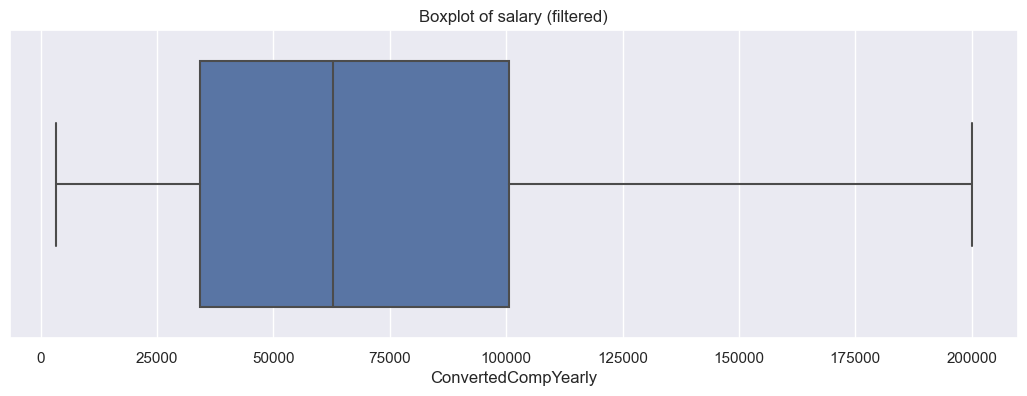

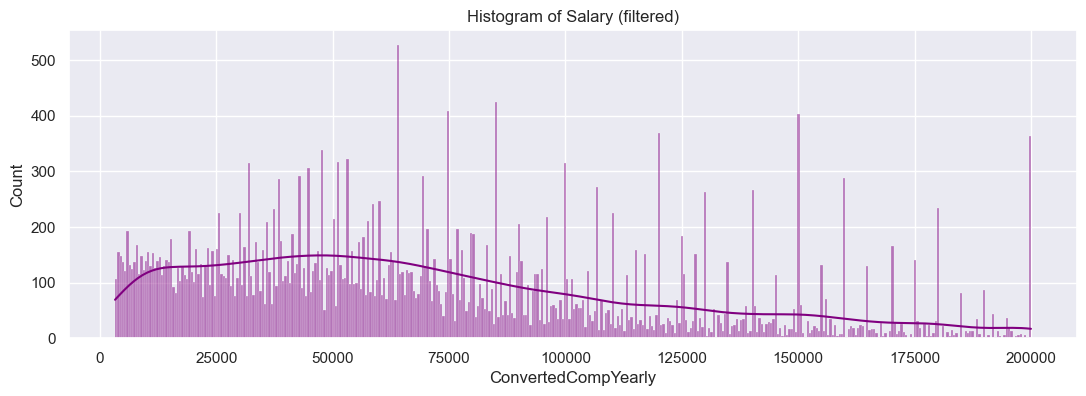

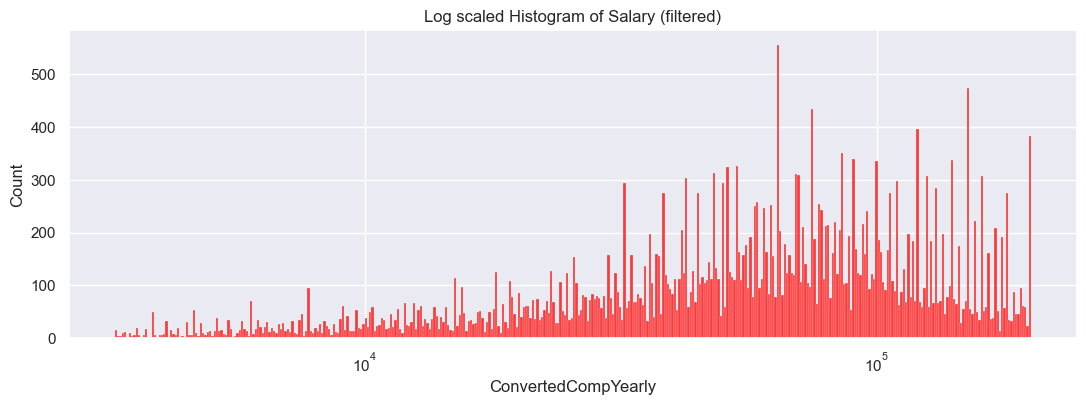

In [3]:
plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100

# df2 = df.copy()
th1 = 2
th2 = 90
thv = [df['ConvertedCompYearly'].dropna().quantile(th1/100.), df['ConvertedCompYearly'].dropna().quantile(th2/100.)]
print(th1,'% percentile value:',thv[0],' | ', th2,'% percentile value:',thv[1])
df = df[(df['ConvertedCompYearly'] >= thv[0]) & (df['ConvertedCompYearly'] <= thv[1])]
# sns.set_theme(style="white", palette=None)
sns.boxplot(data=df,
            x="ConvertedCompYearly").set(title='Boxplot of salary (filtered)')
plt.show()
sns.histplot(data=df, x="ConvertedCompYearly",
             bins=400,
             kde=True,
             color='purple').set(title='Histogram of Salary (filtered)')
plt.show()
sns.histplot(data=df, x="ConvertedCompYearly",
             bins=400,
             log_scale=True,
             color='red').set(title='Log scaled Histogram of Salary (filtered)')
plt.show()

In [4]:
# dc = df[['Age','EdLevel', 'YearsCode', 'ConvertedCompYearly']].dropna()
# dc = pd.DataFrame(dc)
# dc
# ID = df['ResponseId']

dl = df['LanguageHaveWorkedWith']
dataset = []
for txt in dl:
    if type(txt) == str:
        x = txt.split(";")
        dataset.append(x)
    
dataset

res = sorted(list(set(i for j in dataset for i in j)))
# print(res)
# cli = cmd.Cmd()
cmd.Cmd().columnize(res, displaywidth=120)
res = ['C#', 'C++', 'Java', 'JavaScript', 'PHP', 'SQL', 'Python', 'HTML/CSS']
edf = pd.DataFrame(columns=[res], index=range(0, df.shape[0]))
# edf.insert(0, 'ResponseId', ID)
# edf = edf.fillna(0)
edf

APL         C#       Crystal  Erlang   Groovy    JavaScript  Lua          PHP         R     SQL       TypeScript
Assembly    C++      Dart     F#       HTML/CSS  Julia       MATLAB       Perl        Ruby  Scala     VBA       
Bash/Shell  COBOL    Delphi   Fortran  Haskell   Kotlin      OCaml        PowerShell  Rust  Solidity
C           Clojure  Elixir   Go       Java      LISP        Objective-C  Python      SAS   Swift   


C#  C++ Java JavaScript  PHP  SQL Python HTML/CSS
0      NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
1      NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
2      NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
3      NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
4      NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
...    ...  ...  ...        ...  ...  ...    ...      ...
33592  NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
33593  NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
33594  NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
33595  NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN
33596  NaN  NaN  NaN        NaN  NaN  NaN    NaN      NaN

[33597 rows x 8 columns]

In [5]:
edf1 = edf.fillna(0)
dl = df['LanguageHaveWorkedWith']
list_one = res
for k in range(0, len(edf1)):
    txt = dl.iloc[k]
    if type(txt) == str:
        list_two = txt.split(";")
        ids = []
        for i in range(len(list_two)):
            for j in range(len(list_one)):
                if list_two[i]==list_one[j]:
                    ids.append(j)
        edf1.iloc[k, ids] = 1
edf1
# edf1.to_csv('./edf1.csv')
# k

C# C++ Java JavaScript PHP SQL Python HTML/CSS
0      1   1    0          1   0   0      1        1
1      0   0    0          0   0   0      0        0
2      1   0    0          1   0   1      0        1
3      1   0    0          1   0   1      1        1
4      0   0    0          0   0   1      0        1
...   ..  ..  ...        ...  ..  ..    ...      ...
33592  1   0    1          1   0   0      0        1
33593  0   0    0          1   0   0      0        1
33594  1   0    0          1   0   1      0        1
33595  0   0    1          1   0   0      1        0
33596  0   0    0          0   0   0      1        0

[33597 rows x 8 columns]

In [6]:
edf1.to_csv('./edf1.csv')
# edf1

In [7]:
# del edf2
# edf2 = pd.read_csv('./edf1.csv')
edf2 = edf1.copy()
list_cols = ['Age','YearsCode', 'WorkExp', 'ConvertedCompYearly']
dy = df[list_cols]
for lc in list_cols:
    dy = df[lc]
    edf2.insert(len(edf2.columns), lc, dy)
# dy = pd.DataFrame(dy)
# edf2.join(dy)
# # edf2
# edf2 = pd.concat([edf2, dy], axis = 1)
# # dy = df['ConvertedCompYearly']
# edf2.insert(1, 'ConvertedCompYearly', dy)
# g = [edf2, dy]
# g = pd.concat([edf2, dy.reindex(edf2.index)], axis=1)
# g
edf2

C# C++ Java JavaScript PHP SQL Python HTML/CSS              Age  \
0      1   1    0          1   0   0      1        1              NaN   
1      0   0    0          0   0   0      0        0              NaN   
2      1   0    0          1   0   1      0        1  25-34 years old   
3      1   0    0          1   0   1      1        1              NaN   
4      0   0    0          0   0   1      0        1              NaN   
...   ..  ..  ...        ...  ..  ..    ...      ...              ...   
33592  1   0    1          1   0   0      0        1              NaN   
33593  0   0    0          1   0   0      0        1  25-34 years old   
33594  1   0    0          1   0   1      0        1              NaN   
33595  0   0    1          1   0   0      1        0  25-34 years old   
33596  0   0    0          0   0   0      1        0  25-34 years old   

      YearsCode WorkExp ConvertedCompYearly  
0           NaN     NaN                 NaN  
1           NaN     NaN                 NaN  
2            14     NaN             40205.0  
3           NaN     NaN                 NaN  
4           NaN     NaN                 NaN  
...         ...     ...                 ...  
33592       NaN     NaN                 NaN  
33593        18    10.0             72732.0  
33594       NaN     NaN                 NaN  
33595         5     NaN              4092.0  
33596        12     7.0             70380.0  

[33597 rows x 12 columns]

In [8]:
edf2['Age'] = np.where(edf2['Age'] == 'Under 18 years old',18, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '18-24 years old',24, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '25-34 years old',34, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '35-44 years old',44, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '45-54 years old',54, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '55-64 years old',64, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == '65 years or older',70, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == 'Prefer not to say', np.nan, edf2['Age'])
edf2['Age'] = np.where(edf2['Age'] == 'NA', np.nan, edf2['Age'])

edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'Less than 1 year', 1, edf2['YearsCode'])
edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'More than 50 years', 60, edf2['YearsCode'])
edf2['YearsCode'] = np.where(edf2['YearsCode'] == 'NA', np.nan, edf2['YearsCode'])

In [9]:
dt_df = edf2.copy().dropna()
dt_df

C# C++ Java JavaScript PHP SQL Python HTML/CSS Age YearsCode WorkExp  \
8      0   0    0          0   0   1      1        0  34         6     6.0   
11     0   0    1          1   0   1      0        1  44        12    14.0   
12     0   1    0          0   0   0      0        0  34        12     5.0   
14     0   0    0          1   0   1      1        1  34        11     5.0   
21     0   0    1          1   0   1      1        1  34         5     4.0   
...   ..  ..  ...        ...  ..  ..    ...      ...  ..       ...     ...   
33581  1   0    0          0   0   0      0        0  34         6     5.0   
33582  0   0    0          1   0   0      0        1  34        17    10.0   
33591  1   0    0          1   0   0      0        1  64        42    44.0   
33593  0   0    0          1   0   0      0        1  34        18    10.0   
33596  0   0    0          0   0   0      1        0  34        12     7.0   

      ConvertedCompYearly  
8                 49056.0  
11               194400.0  
12                65000.0  
14               110000.0  
21                34126.0  
...                   ...  
33581             50123.0  
33582             48624.0  
33591            106644.0  
33593             72732.0  
33596             70380.0  

[10375 rows x 12 columns]

In [10]:
dt_df = edf2.copy().dropna()
dt_df.columns = dt_df.columns.get_level_values(0)
dfmin = dt_df['ConvertedCompYearly'].min()
dfmax = dt_df['ConvertedCompYearly'].max()
val = (dt_df['ConvertedCompYearly'] - dfmin) / (dfmax - dfmin)
dt_df['ConvertedCompYearly'] = val
# print(dt_df['ConvertedCompYearly'].isnull().values.any())
dt_df

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS Age YearsCode  \
8       0    0     0           0    0    1       1         0  34         6   
11      0    0     1           1    0    1       0         1  44        12   
12      0    1     0           0    0    0       0         0  34        12   
14      0    0     0           1    0    1       1         1  34        11   
21      0    0     1           1    0    1       1         1  34         5   
...    ..  ...   ...         ...  ...  ...     ...       ...  ..       ...   
33581   1    0     0           0    0    0       0         0  34         6   
33582   0    0     0           1    0    0       0         1  34        17   
33591   1    0     0           1    0    0       0         1  64        42   
33593   0    0     0           1    0    0       0         1  34        18   
33596   0    0     0           0    0    0       1         0  34        12   

       WorkExp  ConvertedCompYearly  
8          6.0             0.232805  
11        14.0             0.971537  
12         5.0             0.313843  
14         5.0             0.542562  
21         4.0             0.156922  
...        ...                  ...  
33581      5.0             0.238229  
33582     10.0             0.230610  
33591     44.0             0.525505  
33593     10.0             0.353142  
33596      7.0             0.341188  

[10375 rows x 12 columns]

# Decision Tree (for salary prediction)<a name='dtree' />
<a href=#ind>Go top</a>

In [29]:
dt_df2 = dt_df.copy().dropna()
dt_df2['ConvertedCompYearly'] = pd.cut(x = dt_df2['ConvertedCompYearly'],
                                      bins = [0.,
                                              dt_df2["ConvertedCompYearly"].quantile(0.30),
#                                               dt_df2["ConvertedCompYearly"].quantile(0.75),
                                              np.Inf],
                                      labels=[0, 1])
# dt_df
# dt_df2
dt_df2 = dt_df2.dropna()
dt_df2['ConvertedCompYearly'].value_counts()
# dt_df['ConvertedCompYearly'].isnull().values.any()

1    7260
0    3112
Name: ConvertedCompYearly, dtype: int64

In [30]:
dt_df2

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS Age YearsCode  \
8       0    0     0           0    0    1       1         0  34         6   
11      0    0     1           1    0    1       0         1  44        12   
12      0    1     0           0    0    0       0         0  34        12   
14      0    0     0           1    0    1       1         1  34        11   
21      0    0     1           1    0    1       1         1  34         5   
...    ..  ...   ...         ...  ...  ...     ...       ...  ..       ...   
33581   1    0     0           0    0    0       0         0  34         6   
33582   0    0     0           1    0    0       0         1  34        17   
33591   1    0     0           1    0    0       0         1  64        42   
33593   0    0     0           1    0    0       0         1  34        18   
33596   0    0     0           0    0    0       1         0  34        12   

       WorkExp ConvertedCompYearly  
8          6.0                   1  
11        14.0                   1  
12         5.0                   1  
14         5.0                   1  
21         4.0                   0  
...        ...                 ...  
33581      5.0                   1  
33582     10.0                   1  
33591     44.0                   1  
33593     10.0                   1  
33596      7.0                   1  

[10372 rows x 12 columns]

In [31]:
# isinstance(dt_df.index, pd.MultiIndex)
# column_headers = dt_df.keys().values.tolist()
# type(column_headers[0])
# dt_df.columns = dt_df.columns.get_level_values(0)
# dt_df
column_headers = dt_df2.keys().values.tolist()
column_headers
feature_cols = column_headers[0:len(column_headers)-1]
# label_cols = column_headers
label_cols = column_headers[len(column_headers)-1]

X = dt_df2[feature_cols] # Features
y = dt_df2[label_cols] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6449228791773779


In [14]:
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=column_headers,  
#                    class_names=feature_cols,
#                    filled=True)

# Linear Regression (for salary prediction)<a name='regress' />
<a href=#ind>Go top</a>

In [15]:
dt_df3 = dt_df.copy().dropna()
dt_df3

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS Age YearsCode  \
8       0    0     0           0    0    1       1         0  34         6   
11      0    0     1           1    0    1       0         1  44        12   
12      0    1     0           0    0    0       0         0  34        12   
14      0    0     0           1    0    1       1         1  34        11   
21      0    0     1           1    0    1       1         1  34         5   
...    ..  ...   ...         ...  ...  ...     ...       ...  ..       ...   
33581   1    0     0           0    0    0       0         0  34         6   
33582   0    0     0           1    0    0       0         1  34        17   
33591   1    0     0           1    0    0       0         1  64        42   
33593   0    0     0           1    0    0       0         1  34        18   
33596   0    0     0           0    0    0       1         0  34        12   

       WorkExp  ConvertedCompYearly  
8          6.0             0.232805  
11        14.0             0.971537  
12         5.0             0.313843  
14         5.0             0.542562  
21         4.0             0.156922  
...        ...                  ...  
33581      5.0             0.238229  
33582     10.0             0.230610  
33591     44.0             0.525505  
33593     10.0             0.353142  
33596      7.0             0.341188  

[10375 rows x 12 columns]

In [16]:
dt_df3['Age'] = dt_df3['Age'].astype(float)
dfmin = dt_df3['Age'].min()
dfmax = dt_df3['Age'].max()
val = (dt_df3['Age'] - dfmin) / (dfmax - dfmin)
dt_df3['Age'] = np.round(val,1)

dt_df3

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS  Age YearsCode  \
8       0    0     0           0    0    1       1         0  0.3         6   
11      0    0     1           1    0    1       0         1  0.5        12   
12      0    1     0           0    0    0       0         0  0.3        12   
14      0    0     0           1    0    1       1         1  0.3        11   
21      0    0     1           1    0    1       1         1  0.3         5   
...    ..  ...   ...         ...  ...  ...     ...       ...  ...       ...   
33581   1    0     0           0    0    0       0         0  0.3         6   
33582   0    0     0           1    0    0       0         1  0.3        17   
33591   1    0     0           1    0    0       0         1  0.9        42   
33593   0    0     0           1    0    0       0         1  0.3        18   
33596   0    0     0           0    0    0       1         0  0.3        12   

       WorkExp  ConvertedCompYearly  
8          6.0             0.232805  
11        14.0             0.971537  
12         5.0             0.313843  
14         5.0             0.542562  
21         4.0             0.156922  
...        ...                  ...  
33581      5.0             0.238229  
33582     10.0             0.230610  
33591     44.0             0.525505  
33593     10.0             0.353142  
33596      7.0             0.341188  

[10375 rows x 12 columns]

In [17]:
dt_df3['YearsCode'] = dt_df3['YearsCode'].astype(float)
dfmin = dt_df3['YearsCode'].min()
dfmax = dt_df3['YearsCode'].max()
val = (dt_df3['YearsCode'] - dfmin) / (dfmax - dfmin)
dt_df3['YearsCode'] = val

dt_df3

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS  Age  YearsCode  \
8       0    0     0           0    0    1       1         0  0.3   0.084746   
11      0    0     1           1    0    1       0         1  0.5   0.186441   
12      0    1     0           0    0    0       0         0  0.3   0.186441   
14      0    0     0           1    0    1       1         1  0.3   0.169492   
21      0    0     1           1    0    1       1         1  0.3   0.067797   
...    ..  ...   ...         ...  ...  ...     ...       ...  ...        ...   
33581   1    0     0           0    0    0       0         0  0.3   0.084746   
33582   0    0     0           1    0    0       0         1  0.3   0.271186   
33591   1    0     0           1    0    0       0         1  0.9   0.694915   
33593   0    0     0           1    0    0       0         1  0.3   0.288136   
33596   0    0     0           0    0    0       1         0  0.3   0.186441   

       WorkExp  ConvertedCompYearly  
8          6.0             0.232805  
11        14.0             0.971537  
12         5.0             0.313843  
14         5.0             0.542562  
21         4.0             0.156922  
...        ...                  ...  
33581      5.0             0.238229  
33582     10.0             0.230610  
33591     44.0             0.525505  
33593     10.0             0.353142  
33596      7.0             0.341188  

[10375 rows x 12 columns]

In [18]:
dt_df3['WorkExp'] = dt_df3['WorkExp'].astype(float)
dfmin = dt_df3['WorkExp'].min()
dfmax = dt_df3['WorkExp'].max()
val = (dt_df3['WorkExp'] - dfmin) / (dfmax - dfmin)
dt_df3['WorkExp'] = val

dt_df3

C#  C++  Java  JavaScript  PHP  SQL  Python  HTML/CSS  Age  YearsCode  \
8       0    0     0           0    0    1       1         0  0.3   0.084746   
11      0    0     1           1    0    1       0         1  0.5   0.186441   
12      0    1     0           0    0    0       0         0  0.3   0.186441   
14      0    0     0           1    0    1       1         1  0.3   0.169492   
21      0    0     1           1    0    1       1         1  0.3   0.067797   
...    ..  ...   ...         ...  ...  ...     ...       ...  ...        ...   
33581   1    0     0           0    0    0       0         0  0.3   0.084746   
33582   0    0     0           1    0    0       0         1  0.3   0.271186   
33591   1    0     0           1    0    0       0         1  0.9   0.694915   
33593   0    0     0           1    0    0       0         1  0.3   0.288136   
33596   0    0     0           0    0    0       1         0  0.3   0.186441   

       WorkExp  ConvertedCompYearly  
8         0.12             0.232805  
11        0.28             0.971537  
12        0.10             0.313843  
14        0.10             0.542562  
21        0.08             0.156922  
...        ...                  ...  
33581     0.10             0.238229  
33582     0.20             0.230610  
33591     0.88             0.525505  
33593     0.20             0.353142  
33596     0.14             0.341188  

[10375 rows x 12 columns]

In [19]:
# https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

column_headers = dt_df3.keys().values.tolist()
column_headers
feature_cols = column_headers[0:len(column_headers)-1]
# label_cols = column_headers
label_cols = column_headers[len(column_headers)-1]

X = dt_df3[feature_cols] # Features
y = dt_df3[label_cols] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Intercept: ', regressor.intercept_)
print('Coef ', regressor.coef_)

Intercept:  0.18547373519600416
Coef  [-0.00373688  0.014626    0.00348889  0.0059676   0.007804   -0.00935057
 -0.00384325  0.00444841  0.13256803  0.2899481   0.18522389]


In [20]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

         Actual  Predicted
11610  0.223230   0.274177
18498  0.324232   0.347085
15889  0.949174   0.339960
5238   0.015919   0.252493
12546  0.677999   0.451250
...         ...        ...
30607  0.341076   0.281437
20198  0.124545   0.285627
10279  0.904218   0.407620
30533  0.813625   0.344874
20119  0.191860   0.199764

[3113 rows x 2 columns]


In [21]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.7f}')
print(f'Mean squared error: {mse:.7f}')
print(f'Root mean squared error: {rmse:.7f}')

Mean absolute error: 0.1773799
Mean squared error: 0.0498956
Root mean squared error: 0.2233732


In [22]:
# cmd.Cmd().columnize(feature_cols, displaywidth=80)

In [23]:
# regressor.predict([[1, 0, 0, 0, 0, 0, 0.3, 0.84, 0.12]])